# BLIP: Inference Demo
 - [Image Captioning](#Image-Captioning)
 - [VQA](#VQA)
 - [Feature Extraction](#Feature-Extraction)
 - [Image Text Matching](#Image-Text-Matching)

In [2]:
# install requirements
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install transformers==4.15.0 timm==0.4.12 fairscale==0.4.4
    !git clone https://github.com/salesforce/BLIP
    %cd BLIP

In [21]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')   
    print(f"raw_image type : {raw_image}")

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))
    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

In [23]:
def load_custom_image(image_path,image_size,device):
    raw_image = Image.open(image_path)

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))
    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

# Image Captioning
Perform image captioning using finetuned BLIP model

In [4]:
torch.__version__

'2.0.1+cu117'

In [5]:
torch.cuda.is_available()

True

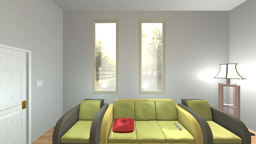

reshape position embedding from 196 to 900
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth
caption: a living room with a couch


In [30]:
from models.blip import blip_decoder

device = "cuda"

# image_size = 384

# image = load_demo_image(image_size=image_size, device=device)
image = load_custom_image(image_path,image_size,device)
model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'
# model_path = "/home/seokjoon/바탕화면/seokjoon/Samsung SDC/code/BLIP/checkpoints/model_base_capfilt_large.pth"
    
model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

with torch.no_grad():
    # beam search
    caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5) 
    # nucleus sampling
    # caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5) 
    print('caption: '+caption[0])

# VQA
Perform visual question answering using finetuned BLIP model

In [6]:
device = 'cuda:0'

In [11]:
import cv2

In [12]:
image_path = "../AI2THOR/RGB_img.jpg"

In [14]:
image = cv2.imread(image_path)

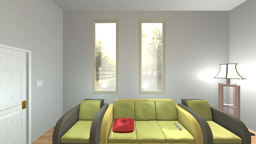

tensor([[[[0.6895, 0.6895, 0.6749,  ..., 0.3975, 0.3975, 0.3975],
          [0.6895, 0.6895, 0.6749,  ..., 0.3975, 0.3975, 0.3975],
          [0.6895, 0.6895, 0.6749,  ..., 0.3975, 0.3975, 0.4121],
          ...,
          [1.0982, 1.0836, 1.1712,  ..., 1.7698, 1.7406, 1.7260],
          [1.0690, 1.0836, 1.1712,  ..., 1.9157, 1.9011, 1.7844],
          [1.0836, 1.1128, 1.1712,  ..., 1.9011, 1.8719, 1.7698]],

         [[0.7992, 0.7992, 0.7842,  ..., 0.4841, 0.4841, 0.4841],
          [0.7992, 0.7992, 0.7842,  ..., 0.4841, 0.4841, 0.4841],
          [0.7992, 0.7992, 0.7842,  ..., 0.4841, 0.4841, 0.4991],
          ...,
          [1.2945, 1.2795, 1.3845,  ..., 1.0994, 1.0694, 1.0694],
          [1.2645, 1.2795, 1.3845,  ..., 1.2945, 1.2795, 1.1444],
          [1.2795, 1.3095, 1.3845,  ..., 1.2795, 1.2495, 1.1444]],

         [[0.7950, 0.7808, 0.7950,  ..., 0.5675, 0.5675, 0.5675],
          [0.7950, 0.7808, 0.8092,  ..., 0.5675, 0.5675, 0.5675],
          [0.7950, 0.7808, 0.8092,  ..., 0

In [24]:
load_custom_image(image_path,480,device)

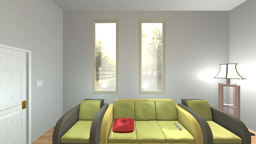

<class 'torch.Tensor'>
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth
answer: in corner


: 

In [35]:
from models.blip_vqa import blip_vqa

image_size = 480
# image = load_demo_image(image_size=image_size, device=device)  
image = load_custom_image(image_path,480,device)

print(type(image))

model_path = '/home/seokjoon/바탕화면/seokjoon/Samsung SDC/code/BLIP/checkpoints/models/model_base_vqa_capfilt_large.pth'
model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth'
    
model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

question = 'Where is lamp?'

with torch.no_grad():
    answer = model(image, question, train=False, inference='generate') 
    print('answer: '+answer[0])

# Feature Extraction

In [ ]:
from models.blip import blip_feature_extractor

image_size = 224
image = load_demo_image(image_size=image_size, device=device)     

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth'
    
model = blip_feature_extractor(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

caption = 'a woman sitting on the beach with a dog'

multimodal_feature = model(image, caption, mode='multimodal')[0,0]
image_feature = model(image, caption, mode='image')[0,0]
text_feature = model(image, caption, mode='text')[0,0]

NameError: name 'load_demo_image' is not defined

# Image-Text Matching

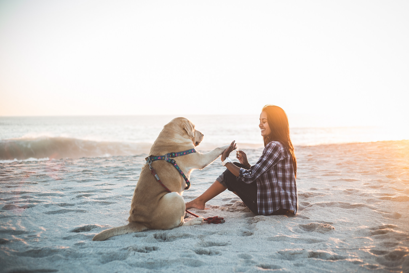

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_retrieval_coco.pth
text: a woman sitting on the beach with a dog
The image and text is matched with a probability of 0.9960
The image feature and text feature has a cosine similarity of 0.5262


In [ ]:
from models.blip_itm import blip_itm

image_size = 384
image = load_demo_image(image_size=image_size,device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_retrieval_coco.pth'
    
model = blip_itm(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device='cpu')

caption = 'a woman sitting on the beach with a dog'

print('text: %s' %caption)

itm_output = model(image,caption,match_head='itm')
itm_score = torch.nn.functional.softmax(itm_output,dim=1)[:,1]
print('The image and text is matched with a probability of %.4f'%itm_score)

itc_score = model(image,caption,match_head='itc')
print('The image feature and text feature has a cosine similarity of %.4f'%itc_score)